# Image Classification 과제
> 인공지능 스터디 세 번째 과제에 오신 것을 환영합니다! 강의를 들으면서 배운 다양한 지식들을 실습을 통해서 활용해볼 시간을 가질 것입니다!

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> KNN (단일선택)
```python
다음 보기 중 KNN에서 'K'는 어떤 역할을 하는지 선택해 주세요.

(1) 거리 측정 방법
(2) 이웃 데이터 포인트의 개수
(3) 분류 결과
(4) 학습률

```

```python
😉
# TODO : (2) 이웃 데이터 포인트의 개수

```

```python
KNN에서 데이터 포인트를 분류하는 데 사용되는 주요 단계 중 하나는 무엇인가요?

(1) 데이터 정규화
(2) 거리 측정
(3) 군집화
(4) 특성 선택
```

```python
😉
# TODO : (2) 거리 측정

```

#### 🐙 강의에서 배운 이미지 분류(Image Classification) 작업을 직접 실습을 통해 훈련(Train)부터 테스트(Test)까지 진행해보아요. 함께 시작해봅시다! 😊

#### 👨‍💻 <font color='green'><b>[ 코딩 ]</b></font> Multi later Perceptron MLP
```python
🐙
코드를 실행하면서 내려가다보면 빈칸이 있어요. 빈칸을 채우면서 진행해주세요.
```

```python
🐙
아래의 코드에서는 필요한 라이브러리를 불러오고 있어요.
또한 PyTorch 버전과 현재 Torch가 사용 중인 디바이스를 확인할 수 있어요.
만약 "device: [cuda:0]"와 같이 출력된다면, 그것은 GPU를 사용하고 있다는 의미에요.
그러나 "device: [cpu]"와 같이 출력된다면, Google Colab에서 런타임 유형을 변경하여 GPU 가속기를 활성화해야 해요.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[2.0.1+cu118].
device:[cuda:0].


### Dataset
```python
데이터 셋으로는 MNIST 데이터셋을 사용합니다.

MNIST는 간단한 컴퓨터 비전 데이터 세트로, 아래와 같이 손으로 쓰여진 이미지들로 구성되어 있습니다.
이 이미지들은 숫자 0부터 9까지의 값으로 표현되며, 각 이미지는 28x28 픽셀 크기로 표준화되어 있습니다.

🐙
Train에 사용되는 data 개수는 60000, Test에 사용되는 data 개수는 10000 개임을 확인할 수 있어요!
```
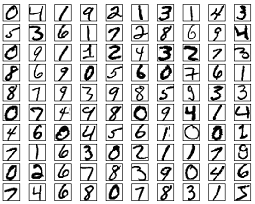


In [2]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

100%|██████████| 9912422/9912422 [00:00<00:00, 103189093.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 103006542.37it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27474759.04it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5529906.75it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


In [4]:
len(mnist_train)

60000

In [5]:
image, label = next(iter(mnist_train))
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

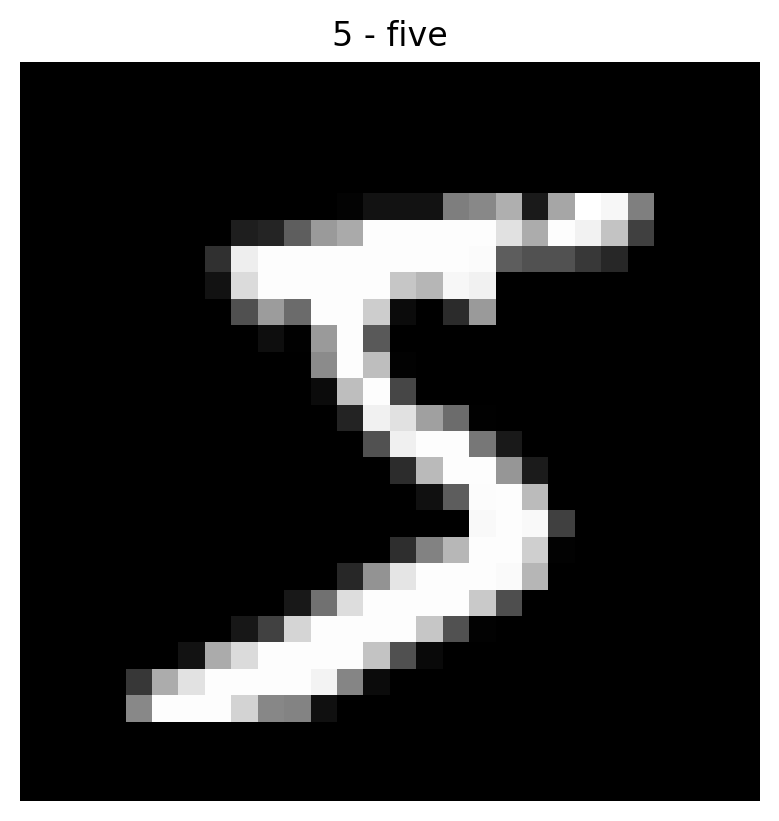

In [6]:
plt.imshow(image.numpy().squeeze(), cmap='gray')
plt.title("{}".format(mnist_train.classes[label]))
plt.axis('off')
plt.show()

### Data Iterator
```python
🐙
원하는 배치 크기(batch size)만큼의 데이터를 데이터셋에서 추출하여 학습을 진행하기 위해 데이터로더(DataLoader)를 정의해요.
데이터로더는 데이터셋을 미니배치로 나누고 셔플링하여 모델 학습에 사용하는 도구에요.
```

In [8]:
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

Done.


### Define the MLP model
```python
🐙
class로 만들어진 모델을 확인할 수 있어요.

PyTorch의 기본 동작은 nn.Linear 레이어를 초기화할 때 파라미터를 무작위로 초기화하게 되지만, 여기서는 초기화를 명시적으로 수행하고 있어요.

빈칸을 채워 모델을 완성 시켜주세요!
```
- [torch.nn.Linear - PyTorch 공식 문서](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)

In [10]:
class MultiLayerPerceptronClass(nn.Module):
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.lin_1 = nn.Linear(self.xdim, self.hdim)
        self.lin_2 = nn.Linear(self.hdim, self.ydim)
        self.init_param() # 파라미터 초기화

    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net)
        return net



```python
🐙
loss 함수는 CrossEntropy(CE)를 사용하고 optimizer는 Adam를 사용하고 있어요.
optimizer를 지정해 줄 때는 어떤 파라미터로 optimize를 할 것인지를 정해줘야 해요.
여기서는 모델 M의 파라미터를 사용하고 있어요.
```

In [11]:
M = MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(M.parameters(),lr=1e-3)
print ("Done.")

Done.


### MLP Model에 dummy data를 넣어 결과를 확인해봅시다
```python
🐙
데이터를 pytorch 모델에서 돌리기 위해서는 현재 활용하고 있는 device에 할당을 해야 해요.
x_numpy라는 dummy data를 만든 다음에 .to(device)를 통해 GPU에 할당하고 있어요.
```

In [12]:
x_numpy = np.random.rand(2,784) # batch size가 2
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch) # forward path
# y_torch = M(x_torch) # forward를 써주지 않아도 결과를 확인할 수 있습니다.
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array
print ("x_numpy:\n",x_numpy)
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.21809672 0.636735   0.93662758 ... 0.23671468 0.11103545 0.1302697 ]
 [0.93466949 0.7078852  0.7216794  ... 0.68661831 0.61939986 0.68270071]]
x_torch:
 tensor([[0.2181, 0.6367, 0.9366,  ..., 0.2367, 0.1110, 0.1303],
        [0.9347, 0.7079, 0.7217,  ..., 0.6866, 0.6194, 0.6827]],
       device='cuda:0')
y_torch:
 tensor([[-0.8636,  0.4319, -0.1820, -0.3749,  0.0987,  0.4285,  0.7801,  0.2332,
          0.3389,  1.1712],
        [-1.1680, -0.3389,  0.6451, -0.7623,  0.0764,  0.2720,  0.1584, -0.3275,
          0.6431,  0.3060]], device='cuda:0', grad_fn=<AddmmBackward0>)
y_numpy:
 [[-0.86364156  0.4319488  -0.18204542 -0.37493035  0.09874822  0.4285213
   0.7801243   0.23321825  0.33887938  1.1712452 ]
 [-1.1680346  -0.33890927  0.6451378  -0.76233655  0.07637855  0.2720077
   0.1584101  -0.32745206  0.6430848   0.3060109 ]]


### Check Parameters
```python
🐙
파라미터가 잘 초기화되었는지 그 값들을 실제로 확인해 볼 수 있어요!
```

In [13]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[ 0.021 -0.004 -0.015 -0.012 -0.002]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[-0.134 -0.052  0.046  0.092 -0.09 ]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


### Evaluation Function
```python
모델을 학습한 후에는 모델의 성능을 평가합니다. 이를 위한 코드를 살펴보겠습니다.

빈칸을 채워 평가를 위한 코드를 완성 시켜주세요!
```
**힌트**<br>
- 이미지의 사이즈와 모델의 입력 사이즈의 차원이 맞지 않습니다.<br>
- dataloader에서 입력받는 이미지의 차원을 바꿔 해결해봅시다.<br>
- 데이터를 변환한 뒤에 .to(device)도 잊지 말아요!
- [Tensor.view() - PyTorch 공식 문서](https://pytorch.org/docs/stable/index.htmlhttps://pytorch.org/docs/stable/generated/torch.Tensor.view.html?highlight=view#torch.Tensor.view)

In [16]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        model.eval() # 평가를 위한 모드 변경
        n_total,n_correct = 0,0
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device) # 정답 라벨
            model_pred = model(
                batch_in.view(batch_in.size(0), -1).to(device)
            )
            _,y_pred = torch.max(model_pred.data,1) # 모델이 예측한 라벨
            n_correct += (
                y_pred == y_trgt
            ).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total)
        model.train() # 평가가 끝나고 다시 학습을 위해 모드 변경
    return val_accr
print ("Done")

Done


### Initial Evaluation
```python
🐙
학습되지 않은 모델의 정확도는 어떨까요?
대략 0.1 정도 임을 확인할 수 있어요.
이는 모델이 무작위로 예측하는 것과 마찬가지이며, 라벨의 개수가 10개이기 때문에 0.1 을 기대할 수 있어요.

```

In [17]:
M.init_param() # 파라미터 초기화
train_accr = func_eval(M,train_iter,device)
test_accr = func_eval(M,test_iter,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.116] test_accr:[0.119].


### Train
```python
🐙
이제 본격적인 학습을 시작 해봅시다!

빈칸을 채워 학습을 위한 코드를 완성 시키고 실행해 주세요!
loss 값이 줄어들고 모델의 accuracy는 올라가는 것을 확인할 수 있어요.
```
**힌트**<br>
- 2주차 퀴즈 4번을 참고 해주세요!


In [18]:
print ("Start training.")
M.init_param() # 파라미터 초기화
M.train()
EPOCHS,print_every = 10,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss = loss_function(y_pred,batch_out.to(device))
        # Update

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_val_sum += loss
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(M,train_iter,device)
        test_accr = func_eval(M,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")

Start training.
epoch:[0] loss:[0.379] train_accr:[0.945] test_accr:[0.943].
epoch:[1] loss:[0.166] train_accr:[0.964] test_accr:[0.959].
epoch:[2] loss:[0.118] train_accr:[0.973] test_accr:[0.967].
epoch:[3] loss:[0.091] train_accr:[0.980] test_accr:[0.971].
epoch:[4] loss:[0.074] train_accr:[0.984] test_accr:[0.974].
epoch:[5] loss:[0.060] train_accr:[0.988] test_accr:[0.975].
epoch:[6] loss:[0.048] train_accr:[0.989] test_accr:[0.975].
epoch:[7] loss:[0.041] train_accr:[0.993] test_accr:[0.976].
epoch:[8] loss:[0.034] train_accr:[0.995] test_accr:[0.978].
epoch:[9] loss:[0.028] train_accr:[0.995] test_accr:[0.978].
Done


### Test
```python
🐙
전체 test 데이터에서 25개의 데이터를 뽑아서 학습된 모델에 대한 결과를 확인할 수 있어요.
모델의 예측한 라벨과 실제 라벨을 비교했을 때 거의 다 맞는 것으로 보여요!
```

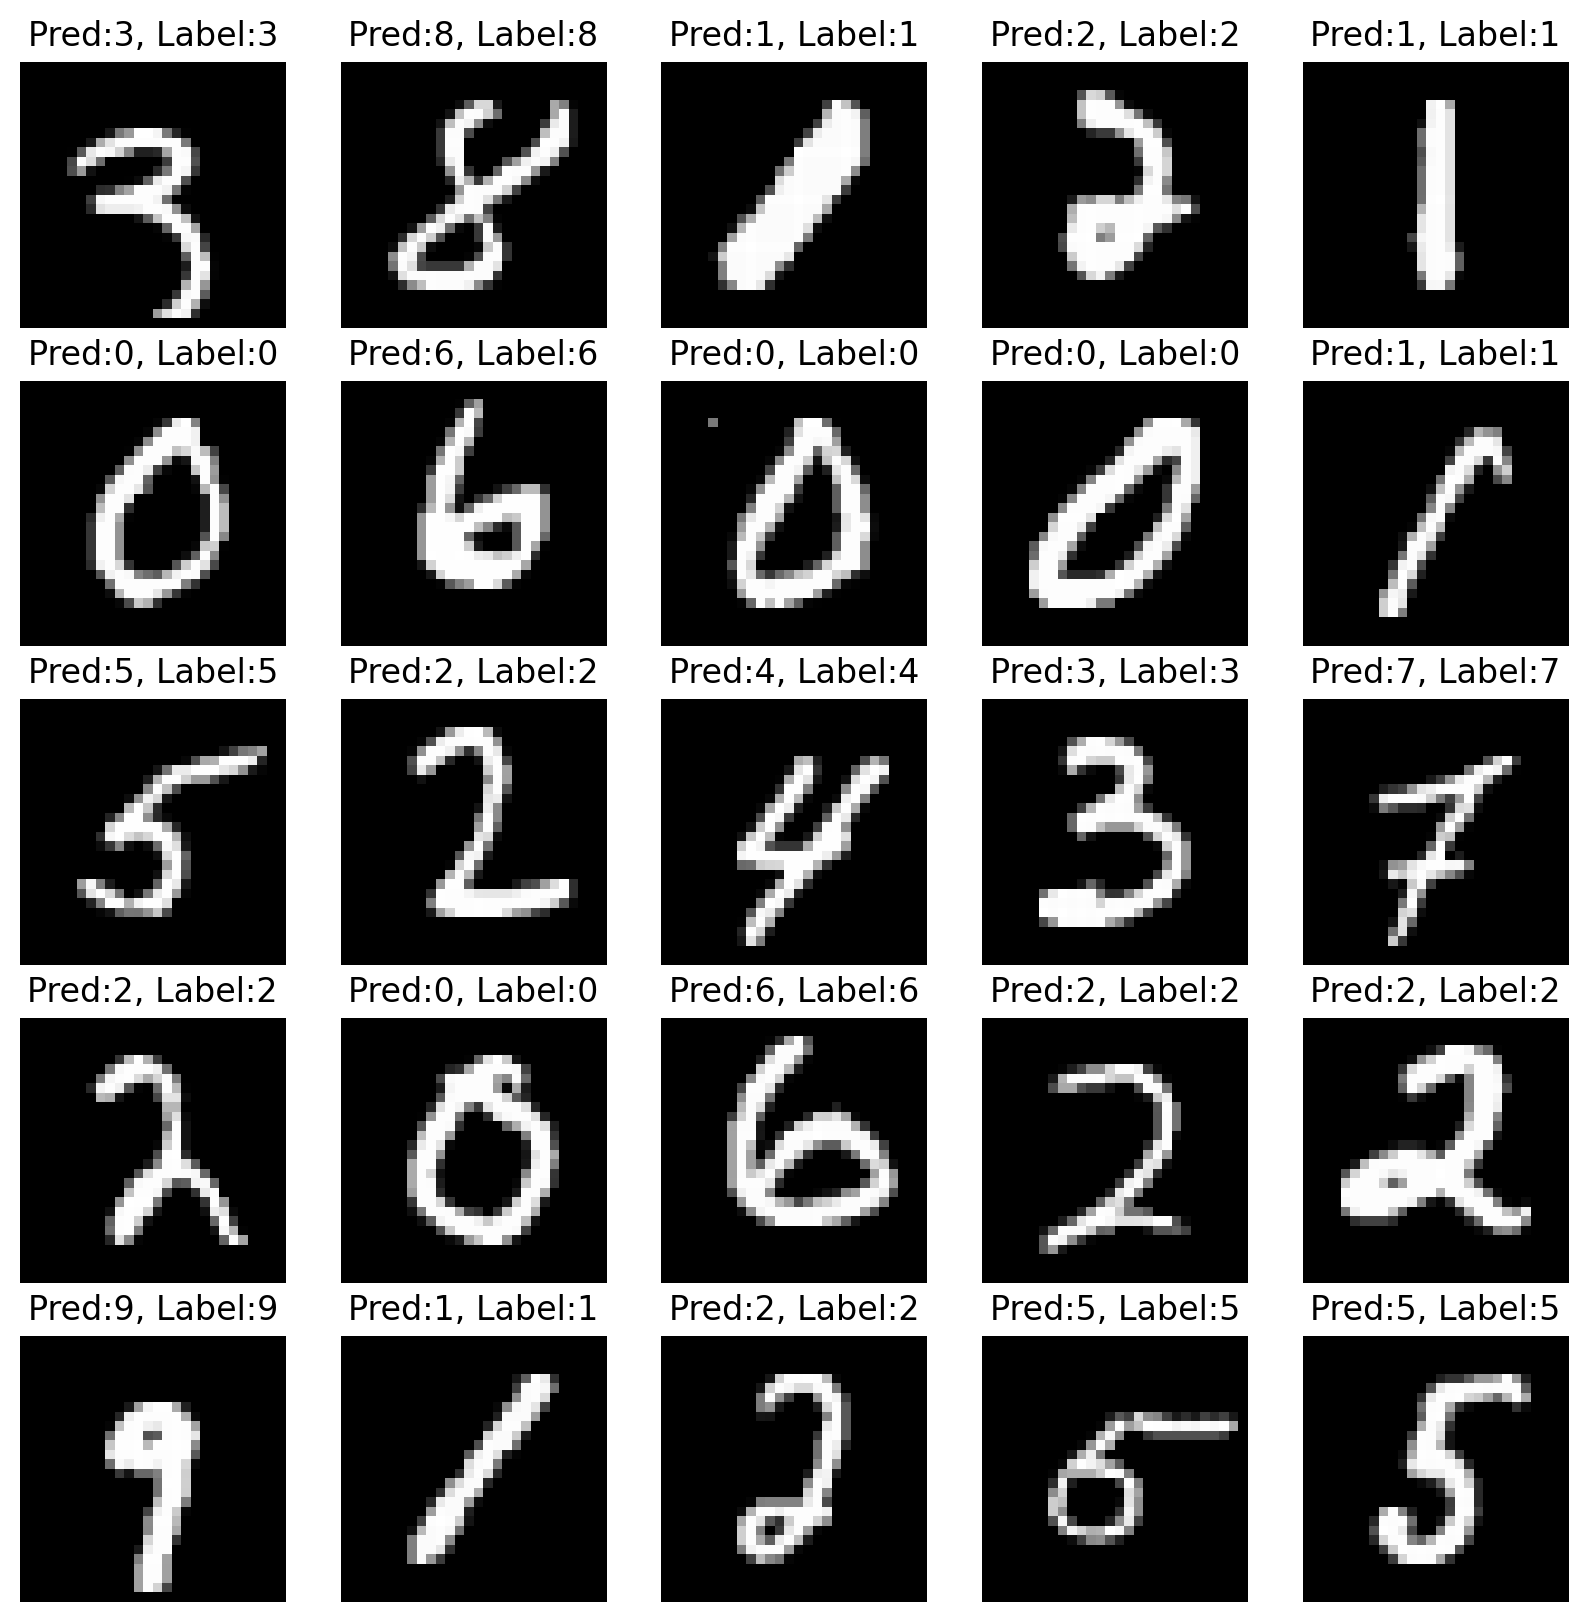

Done


In [19]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()
print ("Done")

```python
🐙
간단한 MLP(다층 퍼셉트론) 모델을 구현하고 학습 및 테스트를 진행해보았어요.
이러한 간단한 MLP 모델조차도 어느 정도 좋은 성능을 내는 것을 확인할 수 있었어요.
이러한 과정에서 모델 아키텍처를 변경하거나 데이터를 수정하는 등 여러 가지 실험을 수행해보면서 다양한 조합을 테스트하고 모델의 성능을 더욱 향상시킬 수 있어요.
```

### 🎉🎉🎉 3주차 과제 완료! 🎉🎉🎉
```python
🐙
여러분 모두 수고 했어요!!
```